<a href="https://colab.research.google.com/github/yerinsally/2022_PythonML/blob/main/8_mid_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Google Mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/data/vote.csv', encoding='utf-8')

#1. 데이터 스케일링

## 1-1. 데이터 : 범주 / 연속 / 레이블(y)로 나누기

In [ ]:
# 범주형 변수 = X1
X1 = data[['gender', 'region']]
X1.head()

,gender,region
0,1,4
1,1,5
2,1,3
3,2,1
4,1,1


In [ ]:
# 연속형 변수 = X2
X2 = data[['edu', 'income', 'age', 'score_gov', 'score_progress', 'score_intention']]
X2.head()

,edu,income,age,score_gov,score_progress,score_intention
0,3,3,3,2,2,4.0
1,2,3,3,2,4,3.0
2,1,2,4,1,3,2.8
3,2,1,3,5,4,2.6
4,1,2,4,4,3,2.4


In [ ]:
y = data[['vote', 'parties']]
y.head()

,vote,parties
0,1,2
1,0,3
2,1,4
3,1,1
4,1,1


## 1-2. 범주형 변수 : One-hot Encoding

In [ ]:
# replace : 변수명 변환
X1['gender'] = X1['gender'].replace([1,2], ['male', 'female']) # 1=male, 2=female
X1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gender,region
0,male,4
1,male,5
2,male,3
3,female,1
4,male,1


In [ ]:
X1['region'] = X1['region'].replace([1,2,3,4,5], ['Sudo', 'Chungcheung', 'Honam', 'Youngnam', 'Others'])
X1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,gender,region
0,male,Youngnam
1,male,Others
2,male,Honam
3,female,Sudo
4,male,Sudo


In [ ]:
# One-hot Encoding
X1_dum = pd.get_dummies(X1)

In [ ]:
# X1_dum은 범주형 데이터인 X1을 One-hot Encoding한 결과로 저장
X1_dum.head()

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam
0,0,1,0,0,0,0,1
1,0,1,0,0,1,0,0
2,0,1,0,1,0,0,0
3,1,0,0,0,0,1,0
4,0,1,0,0,0,1,0


## 1-3. 연속형 변수 : Scaling

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc68d5d8d90>,
      dtype=object)

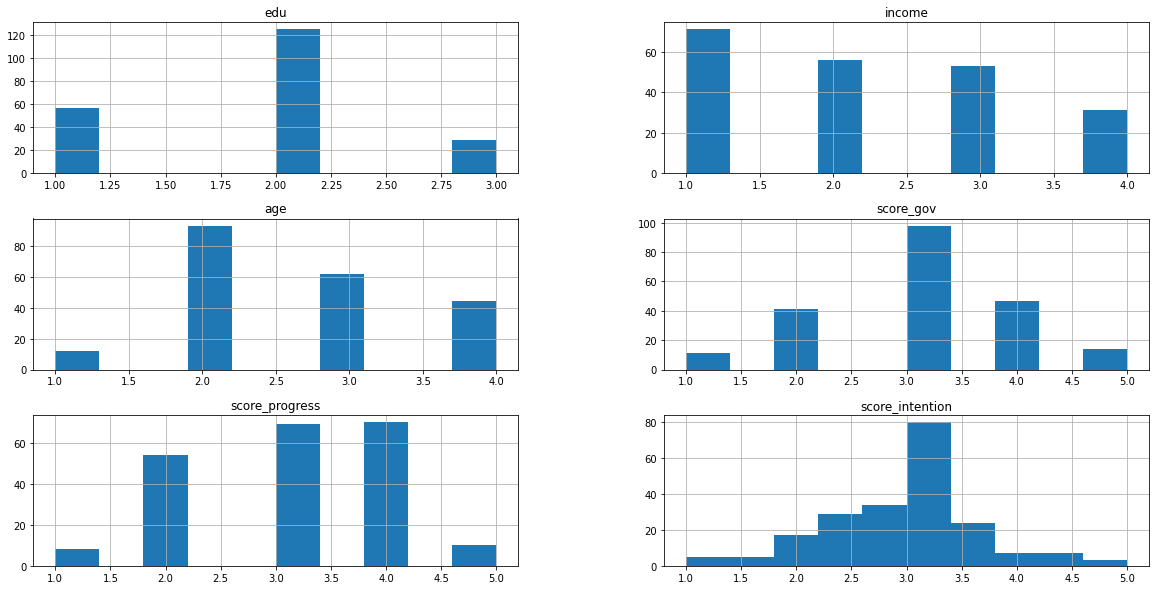

In [ ]:
# 연속형 데이터 상태 확인 : 그래프 출력(시각화)
import matplotlib.pyplot as plt
pd.DataFrame(X2).hist(figsize = (20,10))

### (1) Min-Max Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# 편의성을 위해 이름 지정
scaler1 = MinMaxScaler() 

In [ ]:
scaler1.fit(X2)

MinMaxScaler()

In [ ]:
# 연속형 데이터 X2에 대해 Min-Max scaling으로 변환
# MIn-Max scaling 이름 : X_scaled1
X_scaled1 = scaler1.transform(X2)

In [ ]:
# 리스트 형태의 데이터를 Pandas 데이터프레임으로 변환
pd.DataFrame(X_scaled1).head()
# 스케일링 하면 칼럼명 사라짐

,0,1,2,3,4,5
0,1.0,0.666667,0.666667,0.25,0.25,0.75
1,0.5,0.666667,0.666667,0.25,0.75,0.50
2,0.0,0.333333,1.000000,0.00,0.50,0.45
3,0.5,0.000000,0.666667,1.00,0.75,0.40
4,0.0,0.333333,1.000000,0.75,0.50,0.35


,0,1,2,3,4,5
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,0.433649,0.402844,0.551343,0.514218,0.523697,0.477725
std,0.312982,0.355475,0.290724,0.236113,0.240352,0.181269
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.333333,0.500000,0.250000,0.350000
50%,0.500000,0.333333,0.666667,0.500000,0.500000,0.500000
75%,0.500000,0.666667,0.666667,0.750000,0.750000,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


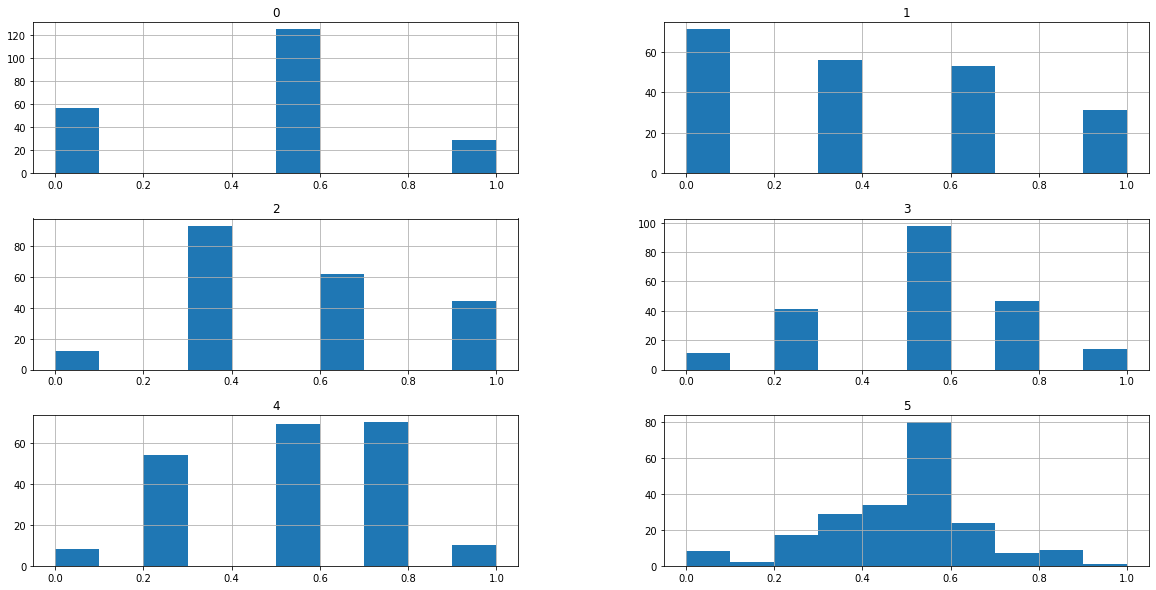

In [ ]:
pd.DataFrame(X_scaled1).hist(figsize = (20,10))
# 왼쪽 끝 0, 오른쪽 끝 1로 맞춰짐
pd.DataFrame(X_scaled1).describe()
# 최소 0, 최대 1

### (2) Standardization Scaling

In [ ]:
# Min-Max와 방법은 동일, 결과는 다름
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler2 = StandardScaler()

In [ ]:
scaler2.fit(X2)

StandardScaler()

In [ ]:
X_scaled2 = scaler2.transform(X2)

,0,1,2,3,4,5
count,2.110000e+02,2.110000e+02,2.110000e+02,2.110000e+02,2.110000e+02,2.110000e+02
mean,5.051252e-17,3.367501e-17,1.683751e-16,-1.557469e-16,-9.681566e-17,-2.188876e-16
std,1.002378e+00,1.002378e+00,1.002378e+00,1.002378e+00,1.002378e+00,1.002378e+00
min,-1.388837e+00,-1.135950e+00,-1.900955e+00,-2.183028e+00,-2.184055e+00,-2.641710e+00
25%,-1.388837e+00,-1.135950e+00,-7.516670e-01,-6.036022e-02,-1.141440e+00,-7.062904e-01
50%,2.124996e-01,-1.960071e-01,3.976209e-01,-6.036022e-02,-9.882600e-02,1.231749e-01
75%,2.124996e-01,7.439362e-01,3.976209e-01,1.000974e+00,9.437883e-01,6.761518e-01
max,1.813836e+00,1.683879e+00,1.546909e+00,2.062307e+00,1.986403e+00,2.888059e+00


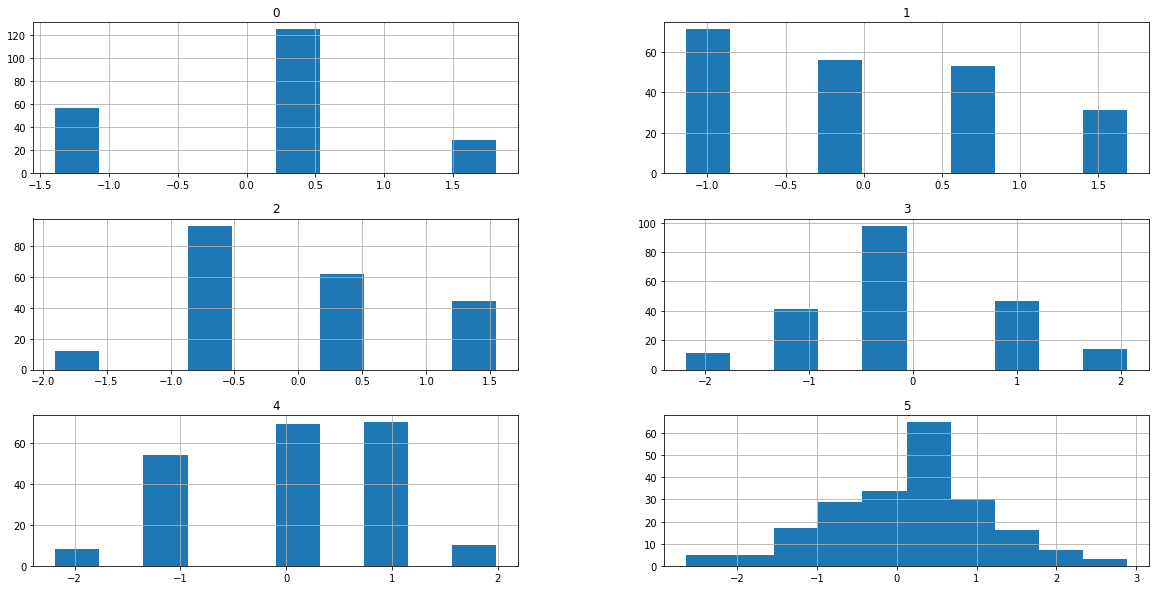

In [ ]:
pd.DataFrame(X_scaled2).hist(figsize=(20,10))
# 평균과 표준편차 포함하는 결과
pd.DataFrame(X_scaled2).describe()

## 1-4. 자료 통합 및 저장하기

In [ ]:
import pandas as pd

In [ ]:
# 연속형 변수 : Min-Max Scaling 택
X_scaled = pd.DataFrame(X_scaled1)

In [ ]:
# Scaling 후 : 칼럼명 원래대로 추가
X_scaled.columns=['edu', 'income', 'age', 'score_gov', 'score_progress', 'score_intention']

In [ ]:
# 범주형 데이터(One-hot Encoding) + 연속형 데이터(Min-Max scaling) + 레이블
Fvote = pd.concat([X1_dum, X_scaled, y], axis=1)
Fvote.head()

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,0,1,0,0,0,0,1,1.0,0.666667,0.666667,0.25,0.25,0.75,1,2
1,0,1,0,0,1,0,0,0.5,0.666667,0.666667,0.25,0.75,0.50,0,3
2,0,1,0,1,0,0,0,0.0,0.333333,1.000000,0.00,0.50,0.45,1,4
3,1,0,0,0,0,1,0,0.5,0.000000,0.666667,1.00,0.75,0.40,1,1
4,0,1,0,0,0,1,0,0.0,0.333333,1.000000,0.75,0.50,0.35,1,1


In [ ]:
Fvote.to_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/data/Fvote.csv', sep=',', encoding='utf-8')

# 2. 데이터셋 나누기

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Fvote.csv : 데이터 스케일링 후
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/data/Fvote.csv', encoding='utf-8')

In [ ]:
data.head()
# 칼럼 0이 삽입됨

,Unnamed: 0,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,0,0,1,0,0,0,0,1,1.0,0.666667,0.666667,0.25,0.25,0.75,1,2
1,1,0,1,0,0,1,0,0,0.5,0.666667,0.666667,0.25,0.75,0.50,0,3
2,2,0,1,0,1,0,0,0,0.0,0.333333,1.000000,0.00,0.50,0.45,1,4
3,3,1,0,0,0,0,1,0,0.5,0.000000,0.666667,1.00,0.75,0.40,1,1
4,4,0,1,0,0,0,1,0,0.0,0.333333,1.000000,0.75,0.50,0.35,1,1


In [ ]:
data.shape

(211, 16)

## 2-1. 특성(X)과 레이블(y) 나누기

In [ ]:
# 특성(X)
# 방법3: loc 함수로 불러오기 (단, 불러올 특성이 연달아 있어야 함)
X = data.loc[:, 'gender_female':'score_intention']

In [ ]:
# 레이블(y)
y = data[["vote"]]
y.head()

,vote
0,1
1,0
2,1
3,1
4,1


## 2-2. train, test 데이터셋 나누기

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Train셋은 X_train, y_train으로, Test셋은 X_test와 y_test으로 정의됨
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

# stratify = 원래 y의 비율에 따라 데이터셋을 랜덤으로 섞기
# random_state = 다음에 실행해도 같은 데이터셋으로 결과 도출

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# Train은 158개, Test은 53개로 분리됨

(158, 13) (53, 13) (158, 1) (53, 1)


## 2-3. 모델 적용

In [ ]:
# KNN 알고리즘 적용 : 대표적인 머신러닝 모델
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# 참조할 이웃의 수 : n_neighbors = @
knn = KNeighborsClassifier(n_neighbors = 3)

### (1) 랜덤없는 교차검증 : cross_val_score

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# 먼저 train 데이터셋에 적용
scores = cross_val_score(knn, X_train, y_train, cv = 5)
# cv = fold(나누는 블럭의 개수)

scores
# 5회 실행한 결과값 : 정확도

array([0.5625    , 0.625     , 0.5625    , 0.61290323, 0.64516129])

In [ ]:
scores.mean()

0.6016129032258064

In [ ]:
# X_test, y_test에 예측
from sklearn.model_selection import cross_val_predict

In [ ]:
cross_val_predict(knn, X_test, y_test, cv = 5)
# label에 대한 예측값

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0])

### (2) 랜덤있는 교차검증 : KFold

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
# parameter : n_splits
kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)

In [ ]:
# train 데이터셋에 cv = kfold 적용
score = cross_val_score(knn, X_train, y_train, cv = kfold)
score

array([0.625     , 0.65625   , 0.6875    , 0.70967742, 0.5483871 ])

In [ ]:
score.mean()

0.6453629032258065

### (3) 임의분할 교차검증

In [ ]:
from sklearn.model_selection import ShuffleSplit

In [ ]:
# test_size와 train_size 정해줌
shuffle_split = ShuffleSplit(test_size = 0.3, train_size = 0.5, random_state = 42)

In [ ]:
# train 데이터셋에 cv = shuffle_split 적용
score = cross_val_score(knn, X_train, y_train, cv = shuffle_split)
score

array([0.54166667, 0.5625    , 0.64583333, 0.625     , 0.5625    ,
       0.66666667, 0.5625    , 0.52083333, 0.6875    , 0.60416667])

In [ ]:
score.mean()

0.5979166666666667

### (4) train / test / validity 분할과 교차검증

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# train, valid, test로 나누기
X_train, X_valid, y_train, y_valid = train_test_split(X_train_val, y_train_val, random_state=2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [ ]:
# train에 적용
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
scores = cross_val_score(knn, X_train, y_train, cv = 5)
scores

array([0.75      , 0.83333333, 0.54166667, 0.60869565, 0.73913043])

In [ ]:
scores.mean()

0.6945652173913043

In [ ]:
# valid에 적용
knn.score(X_valid, y_valid)

0.6

In [ ]:
# test에 적용
knn.score(X_test, y_test)

0.6226415094339622

# 3. 모델 훈련과 세부튜닝

## 3-1. Grid Search

In [ ]:
# 모델 훈련을 위해 GridSearchCV를 선언
from sklearn.model_selection import GridSearchCV

In [ ]:
# GridSearch의 범위를 1~10으로 지정
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9 , 10]}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# KNN 알고리즘에 GridSearch를 적용
# n_neighbors(parameter) : param_grid 넣기

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5, return_train_score = True)
# param_grid = n_neighbors가 한 값이 아니라 1~10까지 돌려보기
# return_train_score = True 조건 넣기

In [ ]:
# Train 데이터에 GridSearch를 적용 -> 모델 만들기
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True)

In [ ]:
# best parameter : 가장 좋은 결과를 얻는 그리드를 출력
print("Best Parameter: {}".format(grid_search.best_params_))

Best Parameter: {'n_neighbors': 9}


In [ ]:
# grid_search의 최종 스코어를 출력
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Cross-validity Score: 0.738


In [ ]:
# Test 데이터에 대해 grid_search 알고리즘을 적용
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.717


In [ ]:
result_grid = pd.DataFrame(grid_search.cv_results_)
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004601,0.001017,0.004512,0.001189,1,{'n_neighbors': 1},0.750000,0.666667,0.625000,0.434783,...,0.617029,0.103433,8,0.989362,1.000000,0.989362,1.000000,0.989474,0.993639,0.005194
1,0.004598,0.000434,0.003892,0.000166,2,{'n_neighbors': 2},0.500000,0.625000,0.583333,0.478261,...,0.550362,0.054062,10,0.755319,0.765957,0.797872,0.852632,0.831579,0.800672,0.037215
2,0.006154,0.004538,0.003823,0.000151,3,{'n_neighbors': 3},0.750000,0.833333,0.541667,0.608696,...,0.694565,0.104945,7,0.797872,0.819149,0.797872,0.852632,0.821053,0.817716,0.020099
3,0.003854,0.000377,0.003560,0.000400,4,{'n_neighbors': 4},0.541667,0.750000,0.416667,0.478261,...,0.585145,0.136080,9,0.776596,0.755319,0.755319,0.778947,0.747368,0.762710,0.012658
4,0.003992,0.000388,0.006188,0.003504,5,{'n_neighbors': 5},0.708333,0.875000,0.583333,0.782609,...,0.737681,0.095458,2,0.776596,0.787234,0.765957,0.800000,0.800000,0.785957,0.013294
5,0.003893,0.001739,0.003196,0.000861,6,{'n_neighbors': 6},0.583333,0.875000,0.583333,0.739130,...,0.703986,0.110300,5,0.734043,0.755319,0.765957,0.800000,0.768421,0.764748,0.021398
6,0.002596,0.000255,0.002883,0.000886,7,{'n_neighbors': 7},0.708333,0.708333,0.625000,0.782609,...,0.703986,0.050055,4,0.808511,0.702128,0.744681,0.768421,0.821053,0.768959,0.043207
7,0.002302,0.000021,0.002163,0.000030,8,{'n_neighbors': 8},0.666667,0.750000,0.625000,0.739130,...,0.695290,0.046207,6,0.765957,0.702128,0.755319,0.778947,0.800000,0.760470,0.032755
8,0.002410,0.000168,0.002205,0.000097,9,{'n_neighbors': 9},0.708333,0.708333,0.708333,0.782609,...,0.738043,0.036387,1,0.787234,0.712766,0.776596,0.757895,0.757895,0.758477,0.025477
9,0.002312,0.000027,0.002178,0.000054,10,{'n_neighbors': 10},0.666667,0.708333,0.625000,0.739130,...,0.704348,0.054893,3,0.765957,0.712766,0.776596,0.768421,0.747368,0.754222,0.022828


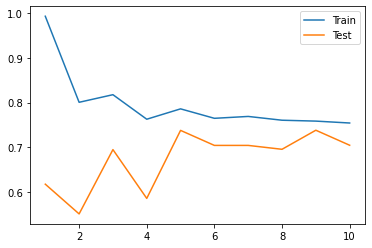

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_train_score'], label = "Train")
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_test_score'], label = "Test")
plt.legend()

## 3-2. Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from scipy.stats import randint

In [ ]:
# n_neighbors에 최소, 최대 주기
param_distribs = {'n_neighbors': randint(low=1, high=20)}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
random_search = RandomizedSearchCV(KNeighborsClassifier(), param_distributions = param_distribs, cv = 5, return_train_score = True)

In [ ]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc67f901f10>},
                   return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(random_search.best_params_))

Best Parameter: {'n_neighbors': 12}


In [ ]:
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))

Best Cross-validity Score: 0.746


In [ ]:
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Test set Score: 0.698


In [ ]:
result_random = pd.DataFrame(random_search.cv_results_)
result_random

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002817,0.000573,0.002838,0.000952,2,{'n_neighbors': 2},0.500000,0.625000,0.583333,0.478261,...,0.550362,0.054062,10,0.755319,0.765957,0.797872,0.852632,0.831579,0.800672,0.037215
1,0.002805,0.000320,0.002927,0.001049,12,{'n_neighbors': 12},0.708333,0.708333,0.750000,0.782609,...,0.746377,0.033266,1,0.776596,0.723404,0.765957,0.778947,0.747368,0.758455,0.020769
2,0.002873,0.000478,0.002440,0.000090,17,{'n_neighbors': 17},0.666667,0.708333,0.708333,0.739130,...,0.721014,0.038464,6,0.755319,0.723404,0.765957,0.726316,0.705263,0.735252,0.022204
3,0.002951,0.000395,0.002468,0.000101,12,{'n_neighbors': 12},0.708333,0.708333,0.750000,0.782609,...,0.746377,0.033266,1,0.776596,0.723404,0.765957,0.778947,0.747368,0.758455,0.020769
4,0.003167,0.001017,0.002908,0.000899,6,{'n_neighbors': 6},0.583333,0.875000,0.583333,0.739130,...,0.703986,0.110300,7,0.734043,0.755319,0.765957,0.800000,0.768421,0.764748,0.021398
5,0.004282,0.000147,0.003857,0.000283,18,{'n_neighbors': 18},0.666667,0.708333,0.708333,0.782609,...,0.729710,0.045793,5,0.765957,0.734043,0.755319,0.726316,0.715789,0.739485,0.018526
6,0.004159,0.000230,0.003830,0.000175,1,{'n_neighbors': 1},0.750000,0.666667,0.625000,0.434783,...,0.617029,0.103433,8,0.989362,1.000000,0.989362,1.000000,0.989474,0.993639,0.005194
7,0.004188,0.000298,0.003708,0.000316,4,{'n_neighbors': 4},0.541667,0.750000,0.416667,0.478261,...,0.585145,0.136080,9,0.776596,0.755319,0.755319,0.778947,0.747368,0.762710,0.012658
8,0.004336,0.000108,0.003876,0.000231,5,{'n_neighbors': 5},0.708333,0.875000,0.583333,0.782609,...,0.737681,0.095458,3,0.776596,0.787234,0.765957,0.800000,0.800000,0.785957,0.013294
9,0.005034,0.001190,0.005075,0.001741,13,{'n_neighbors': 13},0.708333,0.708333,0.750000,0.782609,...,0.737681,0.027910,3,0.776596,0.723404,0.765957,0.715789,0.726316,0.741613,0.024694


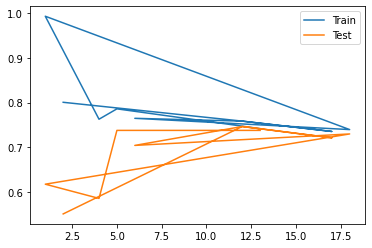

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_random['param_n_neighbors'], result_random['mean_train_score'], label="Train")
plt.plot(result_random['param_n_neighbors'], result_random['mean_test_score'], label="Test")
plt.legend()

In [ ]:
# 결과 csv로 저장
# result_random.to_csv('result_random.csv', sep=',', encoding = 'utf-8')

#4. 이진 분류_모델 평가

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# 앞 단계에서 얻은 best parameter : n_neighbors = 9
knn9 = KNeighborsClassifier(n_neighbors = 9)

In [ ]:
knn9.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
from sklearn.metrics import confusion_matrix
# Confusion matrix에서
# [정확도]Accuracy =(TN + TP) / Total
# [정밀도]Precision = TP / (TP + FP)
# [재현율]Recall = TP / (TP + FN)
# f-score = 2 / ((1 / precision) + (1 / recall))

In [ ]:
# y_train : given label = 알고있는 결과값
pred_train = knn9.predict(X_train)

In [ ]:
# 실제 값 / 예측 값 비교
confusion_train = confusion_matrix(y_train, pred_train)

In [ ]:
print("훈련데이터 오차행렬:\n", confusion_train)
# 118개 중 92개 맞고 26개 틀림

훈련데이터 오차행렬:
 [[ 8 25]
 [ 1 84]]


In [ ]:
# y_test : given label = 알고있는 결과값
pred_test = knn9.predict(X_test)

In [ ]:
confusion_test = confusion_matrix(y_test, pred_test)

In [ ]:
print("테스트데이터 오차행렬:\n", confusion_test)

테스트데이터 오차행렬:
 [[ 1 14]
 [ 1 37]]


In [ ]:
# p31
TP = 37
FP = 14
FN = 1
TN = 1

In [ ]:
# precision
precision = TP/(TP+FP)
precision

0.7254901960784313

In [ ]:
# recall
recall = TP/(TP+FN)
recall

0.9736842105263158

In [ ]:
# f_score : precision과 recall에 대한 조합평균
f_score = 2/((1/precision)+(1/recall))
f_score

0.8314606741573034

In [ ]:
# 일일이 안 구해도 됨
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred_test)
print("f1 score:\n", f1)

f1 score:
 0.8314606741573034


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
cfreport = classification_report(y_test, pred_test)
cfreport

'              precision    recall  f1-score   support\n\n           0       0.50      0.07      0.12        15\n           1       0.73      0.97      0.83        38\n\n    accuracy                           0.72        53\n   macro avg       0.61      0.52      0.47        53\nweighted avg       0.66      0.72      0.63        53\n'

In [ ]:
print("분류예측 레포트:\n", cfreport)
# support : the number of occurrences of each class in y_true
# micro average (averaging the total TP, FN and FP)
# macro average (averaging the unweighted mean per label)
# weighted average (averaging the support-weighted mean per label)

# 최종 f1-score = 0.83

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.50      0.07      0.12        15
           1       0.73      0.97      0.83        38

    accuracy                           0.72        53
   macro avg       0.61      0.52      0.47        53
weighted avg       0.66      0.72      0.63        53



#5. 다중분류_머신러닝

In [ ]:
# 앞단계에서는 y(label) = vote(이진분류)
# y(label) = parties(다준분류)로 머신러닝 진행

## 5-1. 데이터셋 나누기

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd

In [ ]:
# 특성(X)
# 방법3: loc 함수로 불러오기 (단, 불러올 특성이 연달아 있어야 함)
X = data.loc[:, 'gender_female':'score_intention']

In [ ]:
# 레이블(y)
# 지지정당에 대한 결과
y = data[["parties"]]
y.head()

,parties
0,2
1,3
2,4
3,1
4,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, random_state=42 )

## 5-2. Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9 ,10]}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(grid_search.best_params_))

Best Parameter: {'n_neighbors': 1}


In [ ]:
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Cross-validity Score: 0.373


In [ ]:
# Test data에 대한 예측률
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.245


In [ ]:
result_grid = pd.DataFrame(grid_search.cv_results_)
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003076,0.000935,0.002289,0.000149,1,{'n_neighbors': 1},0.37500,0.37500,0.46875,0.290323,...,0.372782,0.057169,1,0.984127,0.984127,0.992063,0.992126,0.976378,0.985764,0.005893
1,0.002345,0.000113,0.002247,0.000059,2,{'n_neighbors': 2},0.31250,0.28125,0.43750,0.322581,...,0.309476,0.078495,8,0.666667,0.658730,0.626984,0.692913,0.637795,0.656618,0.023045
2,0.002259,0.000066,0.002163,0.000031,3,{'n_neighbors': 3},0.37500,0.21875,0.40625,0.258065,...,0.270968,0.111679,10,0.611111,0.619048,0.619048,0.653543,0.645669,0.629684,0.016709
3,0.002285,0.000062,0.002201,0.000086,4,{'n_neighbors': 4},0.34375,0.31250,0.40625,0.258065,...,0.302823,0.072677,9,0.571429,0.563492,0.539683,0.622047,0.590551,0.577440,0.027633
4,0.002334,0.000139,0.002212,0.000092,5,{'n_neighbors': 5},0.37500,0.31250,0.46875,0.354839,...,0.340927,0.089690,5,0.507937,0.603175,0.515873,0.543307,0.574803,0.549019,0.035824
5,0.004468,0.001683,0.005326,0.003155,6,{'n_neighbors': 6},0.37500,0.34375,0.37500,0.290323,...,0.328427,0.046852,6,0.531746,0.523810,0.507937,0.511811,0.527559,0.520572,0.009171
6,0.004187,0.000315,0.004593,0.000652,7,{'n_neighbors': 7},0.28125,0.34375,0.37500,0.354839,...,0.322581,0.044960,7,0.547619,0.555556,0.507937,0.519685,0.551181,0.536395,0.018978
7,0.004681,0.000694,0.004285,0.000134,8,{'n_neighbors': 8},0.34375,0.37500,0.37500,0.419355,...,0.360685,0.042637,4,0.547619,0.523810,0.523810,0.543307,0.566929,0.541095,0.016201
8,0.003808,0.000324,0.003950,0.000161,9,{'n_neighbors': 9},0.28125,0.34375,0.43750,0.387097,...,0.360887,0.051437,3,0.531746,0.563492,0.507937,0.519685,0.551181,0.534808,0.020253
9,0.004017,0.000147,0.004017,0.000160,10,{'n_neighbors': 10},0.28125,0.43750,0.43750,0.322581,...,0.366734,0.062312,2,0.539683,0.531746,0.523810,0.496063,0.535433,0.525347,0.015544


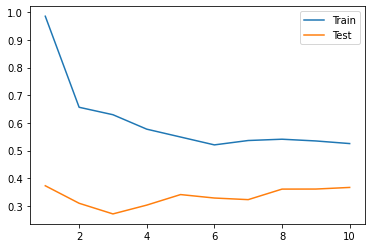

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_test_score'], label="Test")
plt.legend()

## 5-3. Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from scipy.stats import randint

In [ ]:
param_distribs = {'n_neighbors': randint(low=1, high=20)}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
random_search = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_distribs, cv=5, return_train_score=True)

In [ ]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6202c1e490>},
                   return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(random_search.best_params_))

Best Parameter: {'n_neighbors': 17}


In [ ]:
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))

Best Cross-validity Score: 0.411


In [ ]:
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Test set Score: 0.340


In [ ]:
result_random = random_search.cv_results_
pd.DataFrame(result_random)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004117,0.000384,0.004006,0.000172,6,{'n_neighbors': 6},0.37500,0.34375,0.37500,0.290323,...,0.328427,0.046852,7,0.531746,0.523810,0.507937,0.511811,0.527559,0.520572,0.009171
1,0.004376,0.000094,0.004800,0.001128,19,{'n_neighbors': 19},0.31250,0.40625,0.43750,0.419355,...,0.379637,0.051762,4,0.500000,0.452381,0.492063,0.456693,0.456693,0.471566,0.020195
2,0.004130,0.000371,0.004277,0.000166,14,{'n_neighbors': 14},0.37500,0.37500,0.56250,0.451613,...,0.410887,0.091386,2,0.539683,0.484127,0.476190,0.456693,0.440945,0.479528,0.033648
3,0.004072,0.000076,0.004105,0.000238,1,{'n_neighbors': 1},0.37500,0.37500,0.46875,0.290323,...,0.372782,0.057169,5,0.984127,0.984127,0.992063,0.992126,0.976378,0.985764,0.005893
4,0.004252,0.000333,0.003975,0.000295,14,{'n_neighbors': 14},0.37500,0.37500,0.56250,0.451613,...,0.410887,0.091386,2,0.539683,0.484127,0.476190,0.456693,0.440945,0.479528,0.033648
5,0.003800,0.000346,0.004084,0.000258,10,{'n_neighbors': 10},0.28125,0.43750,0.43750,0.322581,...,0.366734,0.062312,6,0.539683,0.531746,0.523810,0.496063,0.535433,0.525347,0.015544
6,0.004459,0.000147,0.004393,0.000406,2,{'n_neighbors': 2},0.31250,0.28125,0.43750,0.322581,...,0.309476,0.078495,8,0.666667,0.658730,0.626984,0.692913,0.637795,0.656618,0.023045
7,0.005534,0.002255,0.004386,0.000332,2,{'n_neighbors': 2},0.31250,0.28125,0.43750,0.322581,...,0.309476,0.078495,8,0.666667,0.658730,0.626984,0.692913,0.637795,0.656618,0.023045
8,0.003466,0.000999,0.003616,0.001286,3,{'n_neighbors': 3},0.37500,0.21875,0.40625,0.258065,...,0.270968,0.111679,10,0.611111,0.619048,0.619048,0.653543,0.645669,0.629684,0.016709
9,0.002318,0.000043,0.002376,0.000187,17,{'n_neighbors': 17},0.34375,0.50000,0.43750,0.451613,...,0.411089,0.067251,1,0.523810,0.484127,0.500000,0.433071,0.456693,0.479540,0.031877


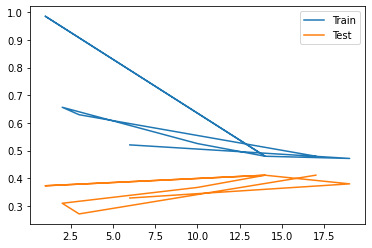

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_random['param_n_neighbors'], result_random['mean_train_score'], label="Train")
plt.plot(result_random['param_n_neighbors'], result_random['mean_test_score'], label="Test")
plt.legend()

## 5-4. 모델평가

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Random Search가 더 나은 모델
knn17 = KNeighborsClassifier(n_neighbors=17)

In [ ]:
knn17.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
pred_train = knn17.predict(X_train)

In [ ]:
confusion_train = confusion_matrix(y_train, pred_train)

In [ ]:
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[ 9  2  2 24]
 [ 3 17  0 20]
 [ 5  4  0 10]
 [ 8  7  0 47]]


In [ ]:
pred_test = knn17.predict(X_test)

In [ ]:
confusion_test = confusion_matrix(y_test, pred_test)

In [ ]:
print("테스트데이터 오차행렬:\n", confusion_test)

테스트데이터 오차행렬:
 [[ 3  2  0  8]
 [ 1  1  0 11]
 [ 2  0  0  4]
 [ 1  6  0 14]]


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1 = f1_score(y_test, pred_test, average="micro" )
# 다중분류일 때 micro / macro 사용

In [ ]:
print("micro f1 score(micro):\n", f1)

micro f1 score(micro):
 0.33962264150943394


In [ ]:
f2 = f1_score(y_test, pred_test, average="macro" )

In [ ]:
print("macro f1 score(macro):\n", f2)

macro f1 score(macro):
 0.21841692789968653


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
cfreport = classification_report(y_test, pred_test)

In [ ]:
print("분류예측 레포트:\n", cfreport)

분류예측 레포트:
               precision    recall  f1-score   support

           1       0.43      0.23      0.30        13
           2       0.11      0.08      0.09        13
           3       0.00      0.00      0.00         6
           4       0.38      0.67      0.48        21

    accuracy                           0.34        53
   macro avg       0.23      0.24      0.22        53
weighted avg       0.28      0.34      0.29        53

